In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns

|      feature      | Description | 
|------------|-----|
| Pregnancies | Number of pregnancies the patient has |
| Glucose | Glucose level of the patient |
| BloodPressure | BloodPressure of the patient |
| SkinThickness | BloodPressure nof the patient |
| Insulin | Insulin level of patient |
| BMI | BMI of the patient |
| DiabetesPedigreeFunction | DiabetesPedigreeFunction of the patient |
| Age | Age of the patient in years |
| Outcome | 0 if no diabetes, 1 if diabetes |

# Analysis

In [6]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#Check if nan values
dataset[dataset.isnull().any(axis=1)]
#No nan values so all good on that part

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


<AxesSubplot:>

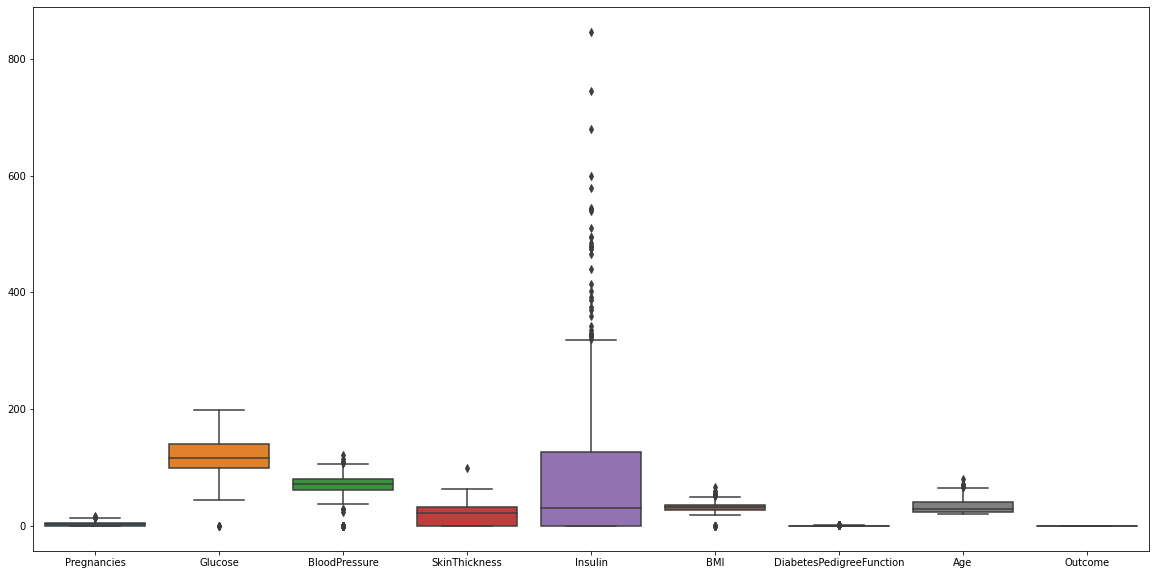

In [15]:
#Check if there are a lot of outliers
fig = plt.figure(figsize=(20,10))
sns.boxplot(data=dataset)

<AxesSubplot:ylabel='Insulin'>

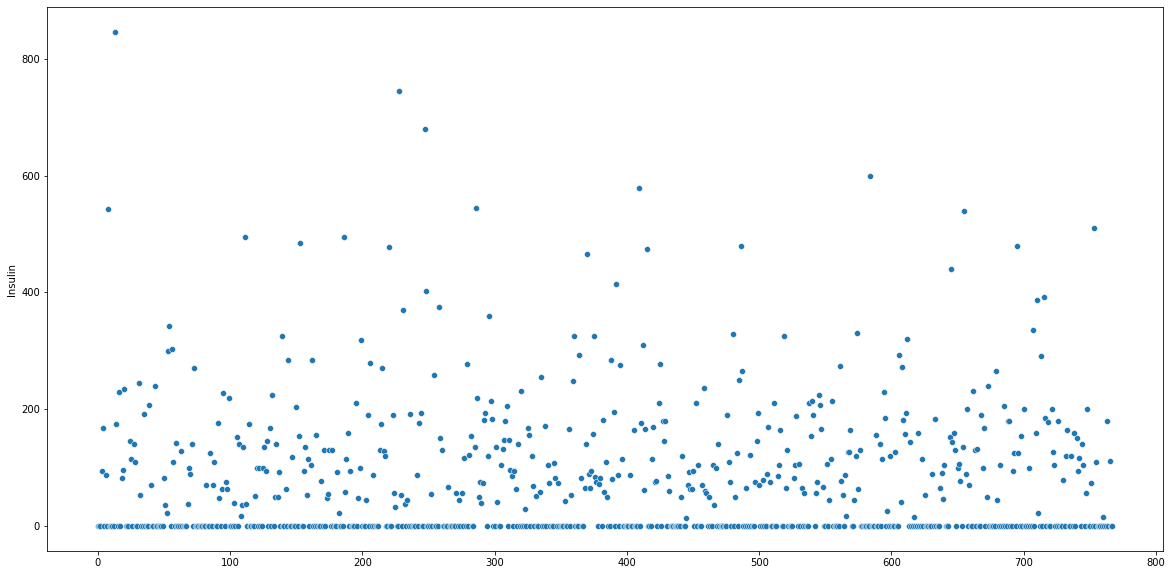

In [18]:
#Seems like a lot of outliers for insuline, lets have closer look
fig = plt.figure(figsize=(20,10))
sns.scatterplot(data=dataset['Insulin'])

#A lot of zeros for insulin, I'm not a docter but after some simple research 
#I found this to be impossible. The same goes for SkinThickness, Glucose and BMI

In [19]:
#Filter out imposible values
dataset= dataset[dataset['Insulin'] > 0]
dataset= dataset[dataset['SkinThickness'] > 0]
dataset= dataset[dataset['Glucose'] > 0]
dataset= dataset[dataset['BMI'] > 0]

<AxesSubplot:>

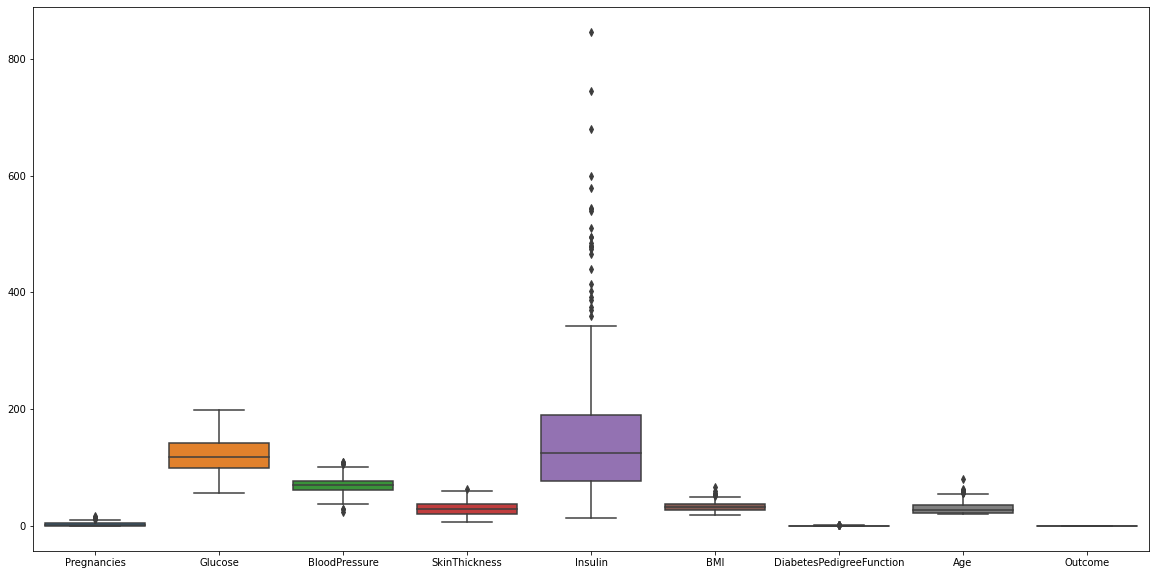

In [20]:
#This already look better
fig = plt.figure(figsize=(20,10))
sns.boxplot(data=dataset)

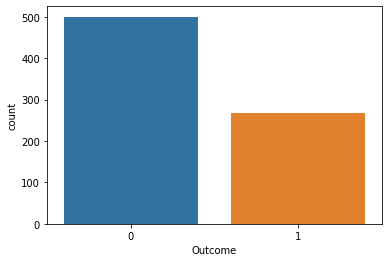

In [7]:
# Cheching the class balancedness
sns.countplot(x='Outcome',data=dataset)
#Almost as many 0 as 1
#we have to take this in consideration for the model so it doesn't create a bias to the 0 class

# Preprocessing 

In [21]:
# Split to features en targets
X = dataset.drop(['Outcome'], axis=1)
y= dataset['Outcome'].values

In [22]:
# training set - test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

**Schaal de dataset**. Zorg er dus voor dat de features op een gelijke schaalverdeling staan. Voor het scalen kan gebruik gemaakt worden van de *preprocessing.StandardScaler()*. Meer info over het gebruik ervan is te vinden op http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [29]:
# Scaling the data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training logistic regression classifier

In [30]:
# Simple log reg model --> optimization can be done with gridsearch (as show in other projects)
#We use class_weight balanced. to help with the bias the model might have
logreg = linear_model.LogisticRegression(C=1,penalty='l1',solver='liblinear',class_weight='balanced')
logreg.fit(X_train, y_train)

LogisticRegression(C=1, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [31]:
# confusion matrix, de accuracy en het classification report.
y_pred = logreg.predict(X_test)

print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred,labels=[1,0]))

print("Accuracy:")
print(accuracy_score(y_test,y_pred)*100)

print("Report:")
print(classification_report(y_test,y_pred))
#If we look at the f1-score we can see the model has some bias for the majority class
#The high recall on majority class also indicates that the model will quicker just chose that class

Confusion matrix:
[[16  9]
 [ 9 45]]
Accuracy:
77.21518987341773
Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        54
           1       0.64      0.64      0.64        25

    accuracy                           0.77        79
   macro avg       0.74      0.74      0.74        79
weighted avg       0.77      0.77      0.77        79



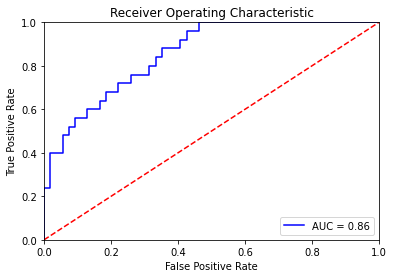

In [32]:
#ROC
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#AUC is 0.86 this means that the model has a 86% chance of classifying a case correctly


In [39]:
# Let's add some Poly features to see if we can bump up performance
graad = 2

poly = PolynomialFeatures(graad)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

logreg = linear_model.LogisticRegression(C=1,solver='saga',class_weight='balanced')
logreg.fit(X_train_poly, y_train)

# confusion matrix, de accuracy en het classification report.
y_pred = logreg.predict(X_test_poly)
y_predtrain= logreg.predict(X_train_poly)
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred,labels=[1,0]))

print("Accuracy (TRAIN - TEST):")
print(accuracy_score(y_train,y_predtrain)*100)
print(accuracy_score(y_test,y_pred)*100)

print("Report:")
print(classification_report(y_test,y_pred))

#our auc score(see graph below) stays about the same but our f1-scores improved a bit


Confusion matrix:
[[16  9]
 [ 5 49]]
Accuracy (TRAIN - TEST):
83.06709265175719
82.27848101265823
Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88        54
           1       0.76      0.64      0.70        25

    accuracy                           0.82        79
   macro avg       0.80      0.77      0.79        79
weighted avg       0.82      0.82      0.82        79



/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


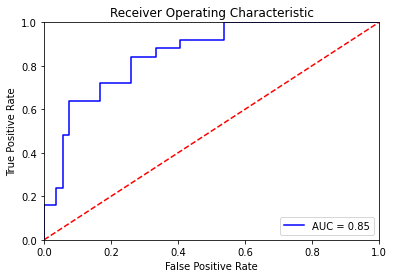

In [40]:
#ROC
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(X_test_poly)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [35]:
# voorspelling
patient= np.array([2,132,74,20,21,24.3,1.28,37])
patient=patient.reshape(1,-1)
patient=scaler.transform(patient)
patient=poly.transform(patient)
outcome= logreg.predict(patient)
print(outcome)
print('kans op geen diabetes/kans op wel diabetes',logreg.predict_proba(patient))
#Model is 85% sure that it is diabetes.

[1]
kans op geen diabetes/kans op wel diabetes [[0.14314864 0.85685136]]


Text(0.5, 1.0, 'Precision-Recall voor bepaling threshold')

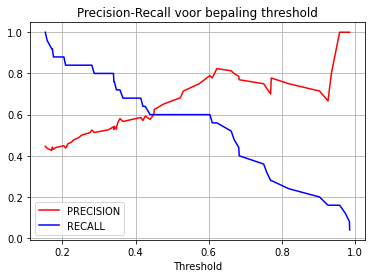

In [36]:
# Looking at different thresholds
from sklearn.metrics import precision_recall_curve
prob=logreg.predict_proba(X_test_poly)
precision, recall, treshold = precision_recall_curve(y_test, prob[:,1]) 
plt.plot(treshold, precision[:-1], c ='r', label ='PRECISION') 
plt.plot(treshold, recall[:-1], c ='b', label ='RECALL') 
plt.grid()
plt.xlabel("Threshold")
plt.legend() 
plt.title('Precision-Recall voor bepaling threshold')

#Since we don't want to tell patients that they don't have diabetes while they do it might be
#a good idea to lower our threshold, this way we can lower our "false negative" cases
#ofcourse we don't want to go to low since our model may perform worse overall

In [45]:
# Here we lower the threshold to 0.4 since we don't want to give up to much precision 
# and we can see that we decrease our false negatives from 9 to 6
graad = 2

poly = PolynomialFeatures(graad)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

logreg = linear_model.LogisticRegression(C=1,solver='saga',class_weight='balanced')
logreg.fit(X_train_poly, y_train)

# confusion matrix, de accuracy en het classification report.
y_predtrain= logreg.predict(X_train_poly)
threshold = 0.4
y_pred = (logreg.predict_proba(X_test_poly)[:, 1] > threshold).astype('float')
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred,labels=[1,0]))

print("Accuracy (TRAIN - TEST):")
print(accuracy_score(y_train,y_predtrain)*100)
print(accuracy_score(y_test,y_pred)*100)

print("Report:")
print(classification_report(y_test,y_pred))

Confusion matrix:
[[19  6]
 [14 40]]
Accuracy (TRAIN - TEST):
83.06709265175719
74.68354430379746
Report:
              precision    recall  f1-score   support

           0       0.87      0.74      0.80        54
           1       0.58      0.76      0.66        25

    accuracy                           0.75        79
   macro avg       0.72      0.75      0.73        79
weighted avg       0.78      0.75      0.75        79



/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
